# Load models

## Load textrecog

In [ ]:
import mlflow
from pathlib import Path

TEXTRECOG_MODEL_NAME = "ABINet"
TEXTRECOG_MODEL_VERSION = "1"

CKPT_ROOT = Path("ckpt/mmocr/")
TEXTRECOG_MODEL_PATH = CKPT_ROOT / TEXTRECOG_MODEL_NAME / TEXTRECOG_MODEL_VERSION
TEXTRECOG_MODEL_PATH.mkdir(parents=True, exist_ok=True)

model_uri = f"models:/{TEXTRECOG_MODEL_NAME}/{TEXTRECOG_MODEL_VERSION}"
model = mlflow.pytorch.load_model(model_uri, dst_path=TEXTRECOG_MODEL_PATH)

In [ ]:
from glob import glob

ckpt_paths = glob(f'{TEXTRECOG_MODEL_PATH}/extra_files/*.pth')
assert len(ckpt_paths) == 1, f"Expected 1 checkpoint file, got {len(ckpt_paths)}"

textrecog_ckpt_path = ckpt_paths[0]

print(textrecog_ckpt_path)

ckpt/mmocr_textrecog/cegdr/ABINet/1/extra_files/best_test_word_acc_epoch_1.pth


In [ ]:
# As function

import mlflow
from pathlib import Path
from glob import glob

TEXTRECOG_MODEL_NAME = "ABINet"
TEXTRECOG_MODEL_VERSION = "1"

def load_model_ckpt(name, version, file_regex="*.pth"):
    ckpt_root = Path("ckpt/mmocr/")
    model_path = ckpt_root / name / version
    model_path.mkdir(parents=True, exist_ok=True)
    
    model_uri = f"models:/{name}/{version}"
    _ = mlflow.pytorch.load_model(model_uri, dst_path=model_path)
    
    ckpt_paths = glob(f'{model_path}/extra_files/{file_regex}')
    assert len(ckpt_paths) == 1, f"Expected 1 checkpoint file, got {len(ckpt_paths)}"
    
    return ckpt_paths[0]

textrecog_ckpt_path = load_model_ckpt(TEXTRECOG_MODEL_NAME, TEXTRECOG_MODEL_VERSION)

: 

## Load textdet

In [10]:
import mlflow
from pathlib import Path

TEXTDET_MODEL_NAME = "DBNet"
TEXTDET_MODEL_VERSION = "1"

CKPT_ROOT = Path("ckpt/mmocr_textdet/cegdr")
TEXTDET_MODEL_PATH = CKPT_ROOT / TEXTDET_MODEL_NAME / TEXTDET_MODEL_VERSION
TEXTDET_MODEL_PATH.mkdir(parents=True, exist_ok=True)

model_uri = f"models:/{TEXTDET_MODEL_NAME}/{TEXTDET_MODEL_VERSION}"
model = mlflow.pytorch.load_model(model_uri, dst_path=TEXTDET_MODEL_PATH)

In [26]:
from glob import glob

ckpt_paths = glob(f'{TEXTDET_MODEL_PATH}/extra_files/*') # HACK: not filtering .pth becuase 
# ckpt_paths = glob(f'{TEXTDET_MODEL_PATH}/extra_files/*.pth')
assert len(ckpt_paths) == 1, f"Expected 1 checkpoint file, got {len(ckpt_paths)}"

textdet_ckpt_path = ckpt_paths[0]

print(textdet_ckpt_path)

ckpt/mmocr_textdet/cegdr/DBNet/1/extra_files/best_test_hmean


In [3]:
# As function

import mlflow
from pathlib import Path
from glob import glob

TEXTRECOG_MODEL_NAME = "DBNet"
TEXTRECOG_MODEL_VERSION = "1"

def load_model_ckpt(name, version, file_regex="*"):
    ckpt_root = Path("ckpt/mmocr/")
    model_path = ckpt_root / name / version
    model_path.mkdir(parents=True, exist_ok=True)
    
    model_uri = f"models:/{name}/{version}"
    _ = mlflow.pytorch.load_model(model_uri, dst_path=model_path)
    
    ckpt_paths = glob(f'{model_path}/extra_files/{file_regex}')
    assert len(ckpt_paths) == 1, f"Expected 1 checkpoint file, got {len(ckpt_paths)}"
    
    return ckpt_paths[0]

textrecog_ckpt_path = load_model_ckpt(TEXTRECOG_MODEL_NAME, TEXTRECOG_MODEL_VERSION)

# Init mmocr inferencer

In [41]:
# Initialize MMOCR
from mmocr.apis import MMOCRInferencer
from mmengine.config import Config

print("[+] Initializing MMOCR...")

mmocr_reader = MMOCRInferencer(
    rec="ABINet",
    rec_weights='ckpt/mmocr_textrecog/cegdr/ABINet/1/extra_files/best_test_word_acc_epoch_1.pth',

    det="configs/textdet/dbnet_custom/dbnet_cegdr.py",
    det_weights='ckpt/mmocr_textdet/cegdr/DBNet/1/extra_files/best_test_hmean',

    device=None
)

[+] Initializing MMOCR...
07/31 11:07:33 - mmengine - INFO - Using env variable `MLFLOW_TRACKING_URI` with value of http://127.0.0.1:5000 to replace item in config.
07/31 11:07:33 - mmengine - INFO - Using env variable `MLFLOW_TRACKING_URI` with value of http://127.0.0.1:5000 to replace item in config.
Loads checkpoint by local backend from path: ckpt/mmocr_textdet/cegdr/DBNet/1/extra_files/best_test_hmean


07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer2.0.conv2 is upgraded to version 2.
07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer2.1.conv2 is upgraded to version 2.
07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer2.2.conv2 is upgraded to version 2.
07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer2.3.conv2 is upgraded to version 2.
07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer3.0.conv2 is upgraded to version 2.
07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer3.1.conv2 is upgraded to version 2.
07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer3.2.conv2 is upgraded to version 2.
07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer3.3.conv2 is upgraded to version 2.
07/31 11:07:34 - mmengine - INFO - ModulatedDeformConvPack backbone.layer3.4.conv2 is upgraded to version 2.
07/31 11:07:34 - mm

In [28]:
# Required imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from inference_sdk import InferenceHTTPClient, InferenceConfiguration
from dotenv import load_dotenv
import json

# Load environment variables
load_dotenv()

# Silence inference warnings
os.environ['QWEN_2_5_ENABLED'] = 'False'
os.environ['CORE_MODEL_SAM_ENABLED'] = 'False'
os.environ['CORE_MODEL_SAM2_ENABLED'] = 'False'
os.environ['CORE_MODEL_CLIP_ENABLED'] = 'False'
os.environ['CORE_MODEL_GAZE_ENABLED'] = 'False'
os.environ['SMOLVLM2_ENABLED'] = 'False'
os.environ['CORE_MODEL_GROUNDINGDINO_ENABLED'] = 'False'
os.environ['CORE_MODEL_YOLO_WORLD_ENABLED'] = 'False'
os.environ['CORE_MODEL_PE_ENABLED'] = 'False'

# Set up matplotlib for better visualization
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [19]:
import os
from dotenv import load_dotenv

load_dotenv()

# Configuration
API_KEY = os.getenv("ROBOFLOW_API_KEY")
if not API_KEY:
    raise ValueError("ROBOFLOW_API_KEY environment variable not set")

# Roboflow model configuration
ROBOFLOW_MODEL_ID = f"cows-gyup1/2"
print(f"[+] Using Roboflow model: {ROBOFLOW_MODEL_ID}")

# Inference configuration
CONF_THRESHOLD = 0.1
FONT_SIZE = 0.7

print(f"[+] Detection confidence threshold: {CONF_THRESHOLD}")

[+] Using Roboflow model: cows-gyup1/2
[+] Detection confidence threshold: 0.1


[+] Loaded test image: data/bonting-identification/samples/ear-tags/detection/sample_cow_ear_tag_midrange_clear.png


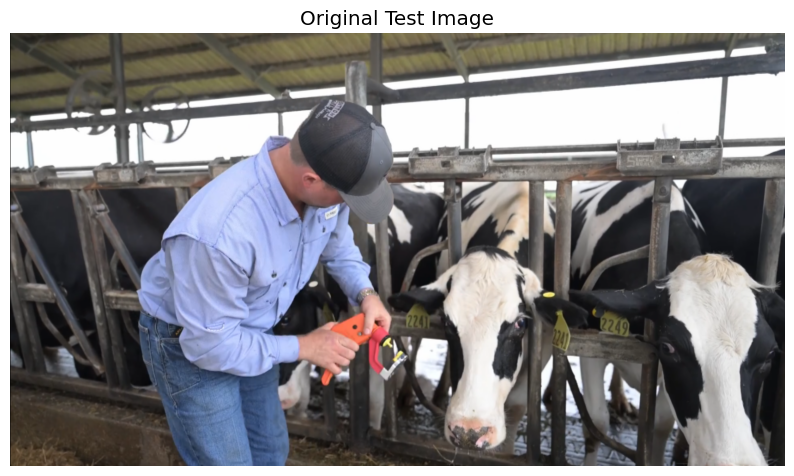

Image shape: (1001, 1793, 3)


In [20]:
# Load test image - adjust path as needed
# test_image_path = input("Enter path to test image (or press Enter to create test image): ").strip()
test_image_path = 'data/bonting-identification/samples/ear-tags/detection/sample_cow_ear_tag_midrange_clear.png'

if not test_image_path or not os.path.exists(test_image_path):
    print("[+] Creating test image with synthetic ear tag...")
    # Create a synthetic test image
    test_image = np.zeros((480, 640, 3), dtype=np.uint8)
    test_image.fill(100)  # Gray background
    
    # Add a white rectangular "ear tag" with text
    cv2.rectangle(test_image, (200, 150), (400, 250), (255, 255, 255), -1)
    cv2.rectangle(test_image, (200, 150), (400, 250), (0, 0, 0), 2)
    
    # Add text to the ear tag
    cv2.putText(test_image, "12345", (240, 190), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 0), 2)
    cv2.putText(test_image, "COW", (250, 220), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    
    # Save test image
    test_image_path = "test_ear_tag.jpg"
    cv2.imwrite(test_image_path, test_image)
    print(f"[+] Test image created: {test_image_path}")
else:
    test_image = cv2.imread(test_image_path)
    print(f"[+] Loaded test image: {test_image_path}")

# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Original Test Image")
plt.axis('off')
plt.show()

print(f"Image shape: {test_image.shape}")


In [21]:
# Initialize Roboflow client
client = InferenceHTTPClient(api_url="http://127.0.0.1:9001", api_key=API_KEY)
client.configure(InferenceConfiguration(confidence_threshold=CONF_THRESHOLD))

print(f"[+] Initialized Roboflow client for model: {ROBOFLOW_MODEL_ID}")
print(f"[+] Confidence threshold: {CONF_THRESHOLD}")

# Run ear tag detection
print("[+] Running ear tag detection...")
detection_result = client.infer(test_image, model_id=ROBOFLOW_MODEL_ID)
# Handle both dict and list responses
if isinstance(detection_result, dict):
    predictions = detection_result.get("predictions", [])
else:
    predictions = detection_result if isinstance(detection_result, list) else []

print(f"[+] Found {len(predictions)} ear tag detections")

# Display detection results
for i, pred in enumerate(predictions):
    print(f"Detection {i+1}:")
    print(f"  Class: {pred.get('class', 'unknown')}")
    print(f"  Confidence: {pred.get('confidence', 0.0):.3f}")
    print(f"  Bbox: x={pred['x']}, y={pred['y']}, w={pred['width']}, h={pred['height']}")
    print()


[+] Initialized Roboflow client for model: cows-gyup1/2
[+] Confidence threshold: 0.1
[+] Running ear tag detection...
[+] Found 5 ear tag detections
Detection 1:
  Class: 0
  Confidence: 0.728
  Bbox: x=1403.0, y=670.0, w=100.0, h=76.0

Detection 2:
  Class: 0
  Confidence: 0.686
  Bbox: x=945.5, y=655.0, w=77.0, h=74.0

Detection 3:
  Class: 0
  Confidence: 0.683
  Bbox: x=1269.0, y=685.0, w=60.0, h=112.0

Detection 4:
  Class: 0
  Confidence: 0.467
  Bbox: x=734.5, y=646.0, w=49.0, h=62.0

Detection 5:
  Class: 0
  Confidence: 0.127
  Bbox: x=902.5, y=745.0, w=43.0, h=54.0



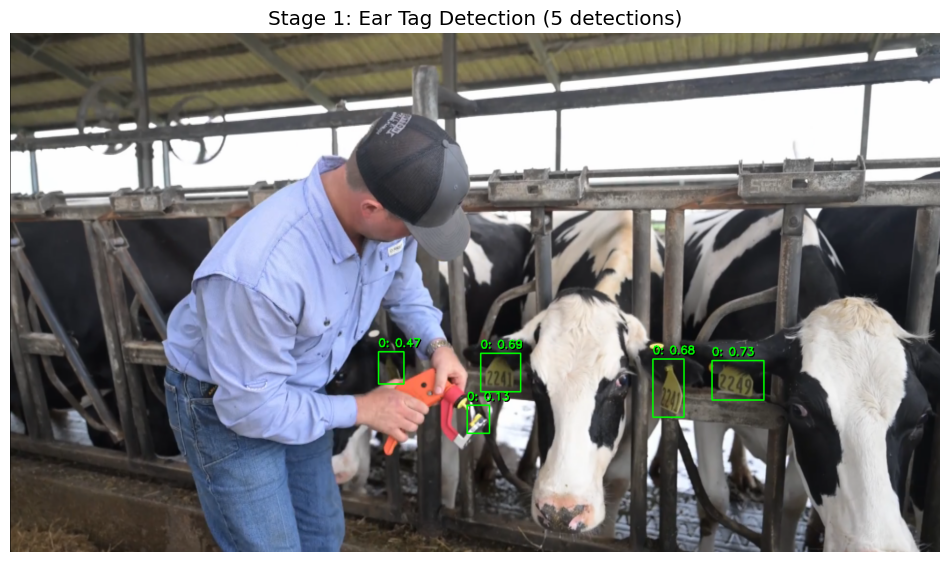

[+] Stage 1 complete. Found 5 regions for OCR processing.


In [22]:
# Visualize Stage 1: Ear tag detection
stage1_image = test_image.copy()
height, width = test_image.shape[:2]

detected_regions = []  # Store detected regions for next stage

for i, pred in enumerate(predictions):
    # Extract bounding box coordinates
    x = int(pred["x"] - pred["width"] / 2)
    y = int(pred["y"] - pred["height"] / 2)
    w = int(pred["width"])
    h = int(pred["height"])
    
    # Ensure coordinates are within image bounds
    x = max(0, min(x, width - 1))
    y = max(0, min(y, height - 1))
    w = max(1, min(w, width - x))
    h = max(1, min(h, height - y))
    
    # Draw bounding box
    cv2.rectangle(stage1_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Add label
    class_name = pred.get("class", "")
    confidence = pred.get("confidence", 0.0)
    label = f"{class_name}: {confidence:.2f}"
    
    # Draw label with shadow
    cv2.putText(stage1_image, label, (x + 2, y - 8), 
               cv2.FONT_HERSHEY_SIMPLEX, FONT_SIZE, (0, 0, 0), 2)
    cv2.putText(stage1_image, label, (x, y - 10), 
               cv2.FONT_HERSHEY_SIMPLEX, FONT_SIZE, (0, 255, 0), 2)
    
    # Store region for next stage
    roi = test_image[y:y+h, x:x+w]
    detected_regions.append({
        'roi': roi,
        'bbox': (x, y, w, h),
        'class': class_name,
        'confidence': confidence
    })

# Display Stage 1 results
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(stage1_image, cv2.COLOR_BGR2RGB))
plt.title(f"Stage 1: Ear Tag Detection ({len(predictions)} detections)")
plt.axis('off')
plt.show()

print(f"[+] Stage 1 complete. Found {len(detected_regions)} regions for OCR processing.")


In [29]:
# Process each detected ear tag region
stage2_results = []

for i, region_data in enumerate(detected_regions):
    roi = region_data['roi']
    bbox = region_data['bbox']
    
    print(f"\n[+] Processing region {i+1}/{len(detected_regions)}")
    print(f"    Class: {region_data['class']}")
    print(f"    Confidence: {region_data['confidence']:.3f}")
    print(f"    ROI shape: {roi.shape}")
    
    if roi.size == 0:
        print("    [!] Empty ROI, skipping...")
        continue
    
    try:
        # Convert BGR to RGB for MMOCR
        roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        
        # Run MMOCR inference
        print("    [+] Running MMOCR inference...")
        mmocr_result = mmocr_reader(
            roi_rgb, 
            return_vis=True, 
            save_vis=False,
            batch_size=1
        )
        
        # Extract results
        predictions_list = mmocr_result.get('predictions', [])
        visualizations = mmocr_result.get('visualization', [])
        
        print(f"    [+] MMOCR predictions: {len(predictions_list)}")
        
        if predictions_list:
            pred_dict = predictions_list[0]  # First (and only) image
            
            # Extract detection and recognition results
            det_polygons = pred_dict.get('det_polygons', [])
            det_scores = pred_dict.get('det_scores', [])
            rec_texts = pred_dict.get('rec_texts', [])
            rec_scores = pred_dict.get('rec_scores', [])
            
            print(f"    [+] Detected text regions: {len(det_polygons)}")
            print(f"    [+] Recognized texts: {len(rec_texts)}")
            
            # Display text recognition results
            for j, (text, score) in enumerate(zip(rec_texts, rec_scores)):
                print(f"      Text {j+1}: '{text}' (confidence: {score:.3f})")
            
            stage2_results.append({
                'region_id': i,
                'roi': roi,
                'roi_rgb': roi_rgb,
                'bbox': bbox,
                'original_region': region_data,
                'mmocr_result': mmocr_result,
                'det_polygons': det_polygons,
                'det_scores': det_scores,
                'rec_texts': rec_texts,
                'rec_scores': rec_scores,
                'visualization': visualizations[0] if visualizations else None
            })
        else:
            print("    [!] No MMOCR predictions found")
            
    except Exception as e:
        print(f"    [-] Error processing region {i+1}: {e}")
        continue

print(f"\n[+] Stage 2 complete. Processed {len(stage2_results)} regions successfully.")


Output()


[+] Processing region 1/5
    Class: 0
    Confidence: 0.728
    ROI shape: (76, 100, 3)
    [+] Running MMOCR inference...


Output()

    [+] MMOCR predictions: 1
    [+] Detected text regions: 0
    [+] Recognized texts: 0

[+] Processing region 2/5
    Class: 0
    Confidence: 0.686
    ROI shape: (74, 77, 3)
    [+] Running MMOCR inference...


Output()

    [+] MMOCR predictions: 1
    [+] Detected text regions: 0
    [+] Recognized texts: 0

[+] Processing region 3/5
    Class: 0
    Confidence: 0.683
    ROI shape: (112, 60, 3)
    [+] Running MMOCR inference...


Output()

    [+] MMOCR predictions: 1
    [+] Detected text regions: 0
    [+] Recognized texts: 0

[+] Processing region 4/5
    Class: 0
    Confidence: 0.467
    ROI shape: (62, 49, 3)
    [+] Running MMOCR inference...


Output()

    [+] MMOCR predictions: 1
    [+] Detected text regions: 0
    [+] Recognized texts: 0

[+] Processing region 5/5
    Class: 0
    Confidence: 0.127
    ROI shape: (54, 43, 3)
    [+] Running MMOCR inference...


    [+] MMOCR predictions: 1
    [+] Detected text regions: 0
    [+] Recognized texts: 0

[+] Stage 2 complete. Processed 5 regions successfully.


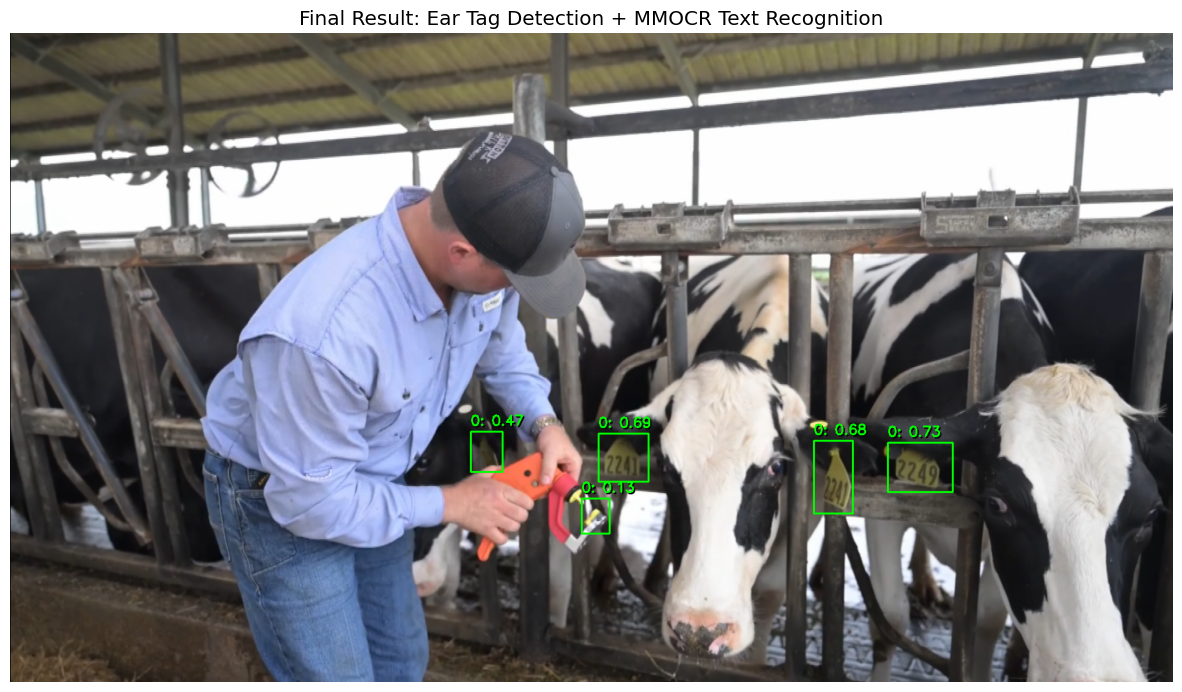

[+] Final result saved to: final_mmocr_result.jpg


In [30]:
## Stage 3: Final Result Visualization

# Create final visualization combining all stages
final_image = test_image.copy()
height, width = test_image.shape[:2]

# Draw all results on the original image
for result in stage2_results:
    region_id = result['region_id']
    bbox = result['bbox']
    x, y, w, h = bbox
    
    # Draw ear tag detection box (green)
    cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Draw ear tag label
    orig_data = result['original_region']
    ear_tag_label = f"{orig_data['class']}: {orig_data['confidence']:.2f}"
    cv2.putText(final_image, ear_tag_label, (x + 2, y - 8), 
               cv2.FONT_HERSHEY_SIMPLEX, FONT_SIZE, (0, 0, 0), 2)
    cv2.putText(final_image, ear_tag_label, (x, y - 10), 
               cv2.FONT_HERSHEY_SIMPLEX, FONT_SIZE, (0, 255, 0), 2)
    
    # Draw OCR results
    if result['rec_texts']:
        # Combine all recognized texts
        all_texts = " | ".join(result['rec_texts'])
        ocr_label = f"OCR: {all_texts}"
        
        # Position OCR text below the ear tag box
        text_y = y + h + 25
        if text_y > height - 20:
            text_y = y - 30
        
        # Draw OCR text with shadow (yellow)
        cv2.putText(final_image, ocr_label, (x + 2, text_y + 2),
                   cv2.FONT_HERSHEY_SIMPLEX, FONT_SIZE, (0, 0, 0), 2)
        cv2.putText(final_image, ocr_label, (x, text_y),
                   cv2.FONT_HERSHEY_SIMPLEX, FONT_SIZE, (255, 255, 0), 2)

# Display final result
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title("Final Result: Ear Tag Detection + MMOCR Text Recognition")
plt.axis('off')
plt.show()

# Save final result
output_path = "final_mmocr_result.jpg"
cv2.imwrite(output_path, final_image)
print(f"[+] Final result saved to: {output_path}")


In [32]:
## Summary and Results

# Print comprehensive summary
print("=" * 60)
print("MMOCR PIPELINE SUMMARY")
print("=" * 60)

print(f"\nStage 1 - Ear Tag Detection:")
print(f"  Model: {ROBOFLOW_MODEL_ID}")
print(f"  Confidence threshold: {CONF_THRESHOLD}")
print(f"  Detections found: {len(detected_regions)}")

print(f"\nStage 2 & 3 - MMOCR Text Detection & Recognition:")
print(f"  Detection algorithm: {TEXTDET_MODEL_NAME}")
print(f"  Recognition algorithm: {TEXTRECOG_MODEL_NAME}")
print(f"  Regions processed: {len(stage2_results)}")

print(f"\nDetailed Results:")
total_texts = 0
for i, result in enumerate(stage2_results):
    region_id = result['region_id']
    orig_data = result['original_region']
    
    print(f"\n  Region {region_id + 1}:")
    print(f"    Ear tag class: {orig_data['class']}")
    print(f"    Ear tag confidence: {orig_data['confidence']:.3f}")
    print(f"    Text detections: {len(result['det_polygons'])}")
    print(f"    Recognized texts: {len(result['rec_texts'])}")
    
    for j, (text, score) in enumerate(zip(result['rec_texts'], result['rec_scores'])):
        print(f"      Text {j+1}: '{text}' (confidence: {score:.3f})")
        total_texts += 1

print(f"\nOverall Summary:")
print(f"  Total ear tags detected: {len(detected_regions)}")
print(f"  Total regions processed by MMOCR: {len(stage2_results)}")
print(f"  Total texts recognized: {total_texts}")
print(f"  Success rate: {len(stage2_results)}/{len(detected_regions)} ({100*len(stage2_results)/max(1,len(detected_regions)):.1f}%)")

print("\n" + "=" * 60)
print("PIPELINE COMPLETE")
print("=" * 60)


MMOCR PIPELINE SUMMARY

Stage 1 - Ear Tag Detection:
  Model: cows-gyup1/2
  Confidence threshold: 0.1
  Detections found: 5

Stage 2 & 3 - MMOCR Text Detection & Recognition:
  Detection algorithm: DBNet
  Recognition algorithm: ABINet
  Regions processed: 5

Detailed Results:

  Region 1:
    Ear tag class: 0
    Ear tag confidence: 0.728
    Text detections: 0
    Recognized texts: 0

  Region 2:
    Ear tag class: 0
    Ear tag confidence: 0.686
    Text detections: 0
    Recognized texts: 0

  Region 3:
    Ear tag class: 0
    Ear tag confidence: 0.683
    Text detections: 0
    Recognized texts: 0

  Region 4:
    Ear tag class: 0
    Ear tag confidence: 0.467
    Text detections: 0
    Recognized texts: 0

  Region 5:
    Ear tag class: 0
    Ear tag confidence: 0.127
    Text detections: 0
    Recognized texts: 0

Overall Summary:
  Total ear tags detected: 5
  Total regions processed by MMOCR: 5
  Total texts recognized: 0
  Success rate: 5/5 (100.0%)

PIPELINE COMPLETE
